# ENTROPY

## Step 0: We import the database as well as the required libraries 

In [36]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd
import math
import matplotlib.pyplot as plt
from fpdf import FPDF

In [37]:
dataFF = pd.read_csv('dataFF.csv')

## Step 1: We create a function to calculate the entropy 

In [38]:
def calc_entropy(column):
    counts = np.bincount(column)
    probability = counts / len(column)
    entropy = 0
    for prob in probability:
        if prob > 0:
            entropy += prob * math.log(prob, 2)

    n = len(counts)
    max_entropy = math.log2(n)  # Maximal Entropy
    
    # Normalize entropy
    normalized_entropy = -entropy / max_entropy if max_entropy > 0 else 0

    return normalized_entropy

In [39]:
dataFF.columns

Index(['Unnamed: 0', 'index', 'Doctor Name', 'Specialty', 'card_0', 'card_3',
       'card_4', 'Latitude', 'Longitude', 'Skills Processed', 'RPPS',
       'Nb Skills', 'moyens_paiement', 'carte_vitale', 'secteur',
       'Présentation', 'Langues parlées',
       'Diplômes nationaux et universitaires', 'Autres formations',
       'Expériences', 'Travaux et publications', 'Prix et distinctions',
       'site', 'Site web', 'Formations',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b', 'Travaux et publications b', 'Nb langues',
       'Expériences b', 'Formations b', 'Carac_card_1', 'Transport', 'Parking',
       'Infos', 'Coordonnées', 'Sans RDV', 'Nb_prix', 'Prix_min', 'Prix_max',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4', 'codecivilité',
       'share_F', 'Code commune', 'Code commune2', 'Code Insee',
       'Population totale',
       'Populat

In [40]:
dataFF.drop(columns= ['Unnamed: 0'],inplace=True)

## Step 2: We create a dictionary to gather all the entropy of the targeted columns 

In [41]:
liste_var = ['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','APL']
entropy={}
for nom_colonne in liste_var : 
    entropy[nom_colonne]=calc_entropy(dataFF[nom_colonne])
print(entropy)

{'Nb Skills': 0.7288335496320483, 'moyens_paiement': 0.7545753288570589, 'carte_vitale': 0.7545753288570589, 'secteur': 0.5254687936414503, 'site': 0.4812384129447856, 'Diplômes nationaux et universitaires b': 0.9990892860167676, 'Nb caractères présentation': 0.4504876217622858, 'Autres formations b': 0.5165355868944494, 'Travaux et publications b': 0.06759024729108375, 'Nb langues': 0.601039830828413, 'Expériences b': 0.3064158428391492, 'Carac_card_1': 0.8922200692056557, 'Transport': 0.9949227960195468, 'Parking': 0.8275601898587014, 'Infos': 0.5764867131101246, 'Coordonnées': 0.9085288739734239, 'Formations b': 0.4812384129447856, 'nb terms card_0': 0.8029769690996342, 'nb terms card_3': 0.5946547487746275, 'nb terms card_4': 0.49878979228354425, 'nb carac card_0': 0.40563895829787694, 'nb carac card_3': 0.30361518630474577, 'nb carac card_4': 0.2504356808668062, 'APL': 0.682501780584019}


In [42]:
liste_var_descri=['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Sans RDV', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']

## Step 3: We check the value of the targeted columns 

In [43]:
print(dataFF[liste_var_descri].describe())

         Nb Skills  moyens_paiement  carte_vitale      secteur         site  \
count  6333.000000      6333.000000   6333.000000  6333.000000  6333.000000   
mean      1.927838         0.783041      0.783041     0.866414     0.103900   
std       2.633487         0.412207      0.412207     0.549362     0.305155   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       0.000000         1.000000      1.000000     1.000000     0.000000   
50%       1.000000         1.000000      1.000000     1.000000     0.000000   
75%       3.000000         1.000000      1.000000     1.000000     0.000000   
max      11.000000         1.000000      1.000000     3.000000     1.000000   

       Diplômes nationaux et universitaires b  Nb caractères présentation  \
count                             6333.000000                 6333.000000   
mean                                 0.517764                  381.137218   
std                                  0.499724            

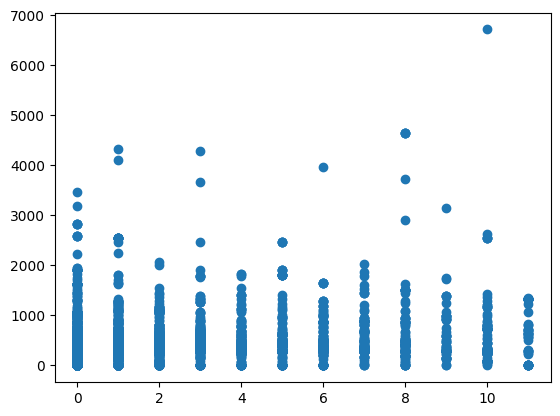

In [44]:
plt.scatter(dataFF['Nb Skills'],dataFF['Nb caractères présentation'])

## Step 4: We create a normalized dataset between 0 and 1 and a normalized dataset in a gaussian way.

In [45]:
def normalize_dataframe(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df

def normalize_gauss(df,column):
    mean = df[column].mean()  # Calculate the mean
    std = df[column].std()    # Calculate standard error
    
    # Normalize the column
    normalized_column = (df[column] - mean) / std
    
    return normalized_column

liste_var_a_norm = ['Nb Skills', 'moyens_paiement',
       'carte_vitale',
       'site', 'Nb caractères présentation','Nb langues',  'Carac_card_1',
       'Transport', 'Parking', 'Coordonnées', 'Sans RDV', 
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','Diplômes nationaux et universitaires b','Autres formations b','Expériences b','Formations b','Travaux et publications b']
dataFF_red = dataFF[liste_var_a_norm]
dataFF_red_norm01 = normalize_dataframe(dataFF_red)
dataFF_red_norm01 = pd.concat([dataFF_red_norm01,dataFF[['RPPS','Nb_prix', 'Prix_min', 'Prix_max','MED14','share_F',"Population standardisée par la consommation de soins par tranche d'âge",'secteur','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']]],axis=1)
dataFF_red_norm_gauss = dataFF[liste_var_a_norm]
for column in dataFF_red_norm_gauss.columns :
    dataFF_red_norm_gauss[column]=normalize_gauss(dataFF_red_norm_gauss,column)
dataFF_red_norm_gauss = pd.concat([dataFF_red_norm_gauss,dataFF[['RPPS','Nb_prix', 'Prix_min', 'Prix_max','share_F','MED14','secteur','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']]],axis=1)

C:\Users\agath\AppData\Local\Temp\ipykernel_26408\3164808146.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFF_red_norm_gauss[column]=normalize_gauss(dataFF_red_norm_gauss,column)


# Step 5: We verify the values of the dataset 

In [46]:
dataFF_red_norm01

,Nb Skills,moyens_paiement,carte_vitale,site,Nb caractères présentation,Nb langues,Carac_card_1,Transport,Parking,Coordonnées,...,Nb_doct_f_30km,Nb_doct_D_2km,Nb_doct_D_8km,Nb_doct_D_30km,Nb_doct_f_D_2km,Nb_doct_f_D_8km,Nb_doct_f_D_30km,APL,Fibre,share_Doctolib
0,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679,4.1504,0.978945,0.054452
1,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.037818,0.000347,0.001737,0.003970,0.000248,0.031267,0.068936,4.1504,0.978945,0.054452
2,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679,1.8940,0.989444,0.076923
3,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.037818,0.000347,0.001737,0.003970,0.000248,0.031267,0.068936,1.8940,0.989444,0.076923
4,0.090909,1.0,1.0,0.0,0.040804,0.000,0.468912,1.0,0.0,1.0,...,0.012282,0.000240,0.001199,0.001621,0.000108,0.016955,0.021123,2.2930,0.987582,0.107438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6328,0.272727,1.0,1.0,0.0,0.042293,0.125,0.533679,1.0,1.0,0.0,...,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679,4.1504,0.978945,0.054452
6329,0.000000,0.0,0.0,0.0,0.030827,0.250,0.419689,0.0,0.0,1.0,...,0.236173,0.000553,0.001383,0.029038,0.000277,0.010232,0.401825,3.4120,0.974766,0.153846
6330,0.000000,1.0,1.0,0.0,0.042293,0.000,0.225389,0.0,0.0,1.0,...,0.104447,0.000561,0.003176,0.018871,0.000187,0.043722,0.244955,3.8130,0.970577,0.037736
6331,0.181818,1.0,1.0,0.0,0.042293,0.000,0.183938,0.0,0.0,1.0,...,0.081081,0.001422,0.001422,0.002845,0.000000,0.119488,0.167852,2.3290,0.919643,0.250000


In [47]:
print(dataFF_red_norm_gauss)

      Nb Skills  moyens_paiement  carte_vitale      site  \
0      3.065199         0.526335      0.526335  2.936538   
1      3.065199         0.526335      0.526335  2.936538   
2      3.065199         0.526335      0.526335  2.936538   
3      3.065199         0.526335      0.526335  2.936538   
4     -0.352323         0.526335      0.526335 -0.340483   
...         ...              ...           ...       ...   
6328   0.407126         0.526335      0.526335 -0.340483   
6329  -0.732048        -1.899632     -1.899632 -0.340483   
6330  -0.732048         0.526335      0.526335 -0.340483   
6331   0.027402         0.526335      0.526335 -0.340483   
6332  -0.732048         0.526335      0.526335 -0.340483   

      Nb caractères présentation  Nb langues  Carac_card_1  Transport  \
0                       5.698280    0.911518      0.370301   1.087591   
1                       5.698280    0.911518      0.370301   1.087591   
2                       5.698280    0.911518      0.370301  

# Step 6: We rename the columns 

In [48]:
dataFF.columns

Index(['index', 'Doctor Name', 'Specialty', 'card_0', 'card_3', 'card_4',
       'Latitude', 'Longitude', 'Skills Processed', 'RPPS', 'Nb Skills',
       'moyens_paiement', 'carte_vitale', 'secteur', 'Présentation',
       'Langues parlées', 'Diplômes nationaux et universitaires',
       'Autres formations', 'Expériences', 'Travaux et publications',
       'Prix et distinctions', 'site', 'Site web', 'Formations',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b', 'Travaux et publications b', 'Nb langues',
       'Expériences b', 'Formations b', 'Carac_card_1', 'Transport', 'Parking',
       'Infos', 'Coordonnées', 'Sans RDV', 'Nb_prix', 'Prix_min', 'Prix_max',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4', 'codecivilité',
       'share_F', 'Code commune', 'Code commune2', 'Code Insee',
       'Population totale',
       'Population standardisée par 

In [49]:
dataFF_red_norm01.rename(columns={'moyens_paiement':'Payment_method','carte_vitale':'Social_security_card','secteur':'Sector','Présentation':'Presentation','Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'National_&_university_degrees','Nb caractères présentation':'Nb_charac_presentation','Autres formations b':'Other_formations_b','Travaux et publications b':'Work_&_publications_b','Nb langues':'Nb_languages','Expériences b':'Experiences_b','Sans RDV':'Without_appointment','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_charac_card_0','nb carac card_3':'nb_charac_card_3','nb carac card_4':'nb_charac_card_4','Coordonnées':'Contact','Nb_prix':'Nb_price','Prix_min':'Min_price','Prix_max':'Max_price','Carac_card_1':'nb_charac_card_1'},inplace=True)
dataFF_red_norm_gauss.rename(columns={'moyens_paiement':'Payment_method','carte_vitale':'Social_security_card','secteur':'Sector','Présentation':'Presentation','Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'National_&_university_degrees','Nb caractères présentation':'Nb_charac_presentation','Autres formations b':'Other_formations_b','Travaux et publications b':'Work_&_publications_b','Nb langues':'Nb_languages','Expériences b':'Experiences_b','Sans RDV':'Without_appointment','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_charac_card_0','nb carac card_3':'nb_charac_card_3','nb carac card_4':'nb_charac_card_4','Coordonnées':'Contact','Nb_prix':'Nb_price','Prix_min':'Min_price','Prix_max':'Max_price','Carac_card_1':'nb_charac_card_1'},inplace=True)
dataFF.rename(columns={'moyens_paiement':'Payment_method','carte_vitale':'Social_security_card','secteur':'Sector','Présentation':'Presentation','Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'National_&_university_degrees','Nb caractères présentation':'Nb_charac_presentation','Autres formations b':'Other_formations_b','Travaux et publications b':'Work_&_publications_b','Nb langues':'Nb_languages','Expériences b':'Experiences_b','Sans RDV':'Without_appointment','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_charac_card_0','nb carac card_3':'nb_charac_card_3','nb carac card_4':'nb_charac_card_4','Coordonnées':'Contact','Nb_prix':'Nb_price','Prix_min':'Min_price','Prix_max':'Max_price','Carac_card_1':'nb_charac_card_1'},inplace=True)

# Step 7 : We create a new column to sum all the indicator in only one variable

In [50]:
dataFF_red_norm_gauss['sum']=dataFF_red_norm_gauss['Nb_Skills']+dataFF_red_norm_gauss['Payment_method']+dataFF_red_norm_gauss['Social_security_card']+dataFF_red_norm_gauss['site']+dataFF_red_norm_gauss['Nb_charac_presentation']+dataFF_red_norm_gauss['Nb_languages']+dataFF_red_norm_gauss['nb_charac_card_1']+dataFF_red_norm_gauss['Transport']+dataFF_red_norm_gauss['Parking']+dataFF_red_norm_gauss['nb_terms_card_0']+dataFF_red_norm_gauss['nb_terms_card_3']+dataFF_red_norm_gauss['nb_terms_card_4']+dataFF_red_norm_gauss['nb_charac_card_0']+dataFF_red_norm_gauss['nb_charac_card_3']+dataFF_red_norm_gauss['nb_charac_card_4']+dataFF_red_norm_gauss['National_&_university_degrees']+dataFF_red_norm_gauss['Other_formations_b']+dataFF_red_norm_gauss['Experiences_b']+dataFF_red_norm_gauss['Formations_b']+dataFF_red_norm_gauss['Work_&_publications_b']

# Step 8: We export the two data base 

In [51]:
dataFF_red_norm01.to_csv('dataFF_red_norm01.csv')
dataFF_red_norm_gauss.to_csv('dataFF_red_norm_gauss.csv')

In [52]:
liste_var_descri=['Nb_Skills', 'Payment_method',
       'Social_security_card', 'Sector',
       'site',
       'National_&_university_degrees', 'Nb_charac_presentation',
       'Other_formations_b','Work_&_publications_b','Nb_languages', 'Experiences_b', 'nb_charac_card_1',
       'Transport', 'Parking', 'Infos', 'Contact', 'Without_appointment', 'Formations_b', 'Min_price','Max_price','Nb_price',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']
# Obtenir les statistiques descriptives
desc = dataFF[liste_var_descri].describe()

# Initialiser le PDF
pdf = FPDF()

# Ajouter une page
pdf.add_page()

# Définir la police
pdf.set_font("Arial", size=12)

# Ajouter un titre
pdf.cell(200, 10, txt="Statistiques Descriptives par Colonne (Deux Colonnes)", ln=True, align='C')

# Saut de ligne après le titre
pdf.ln(10)

# Largeur pour chaque colonne (demi-page)
column_width = pdf.w / 2 - 10  # Largeur de chaque colonne dans le PDF (avec une petite marge)

# Ajouter les statistiques par colonne, deux colonnes à la fois
columns = list(desc.columns)
for i in range(0, len(columns), 2):
    # Vérifier si la hauteur de la page est atteinte, et ajouter une nouvelle page si nécessaire
    if pdf.get_y() > 270:  # Ajuster la limite avant saut de page
        pdf.add_page()
    
    # Position de départ pour la première colonne (à gauche)
    pdf.set_x(10)  # Marge à gauche
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(column_width, 10, txt=f"Colonne: {columns[i]}", ln=False)  # ln=False pour rester sur la même ligne

    # Position de départ pour la deuxième colonne (à droite), si elle existe
    if i + 1 < len(columns):
        pdf.set_x(column_width + 20)  # Marge à droite de la première colonne
        pdf.cell(column_width, 10, txt=f"Colonne: {columns[i+1]}", ln=True)  # ln=True pour passer à la ligne suivante
    else:
        pdf.ln(10)  # Si c'est la dernière colonne impaire, aller à la ligne

    # Afficher les statistiques pour les deux colonnes
    for stat_name in desc.index:
        # Première colonne (gauche)
        pdf.set_x(10)
        pdf.set_font("Arial", size=12)
        stat_value_col1 = desc.loc[stat_name, columns[i]]
        pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col1:.2f}", ln=False)
        
        # Deuxième colonne (droite), s'il y a une deuxième colonne
        if i + 1 < len(columns):
            pdf.set_x(column_width + 20)
            stat_value_col2 = desc.loc[stat_name, columns[i+1]]
            pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col2:.2f}", ln=True)
        else:
            pdf.ln(10)  # Si pas de deuxième colonne, aller à la ligne

    # Ajouter un espace vertical entre les paires de colonnes
    pdf.ln(5)

# Sauvegarder le PDF
pdf_file = "statistiques_descriptives_deux_colonnes.pdf"
pdf.output(pdf_file)

print(f"Le fichier PDF a été créé : {pdf_file}")

Le fichier PDF a été créé : statistiques_descriptives_deux_colonnes.pdf


4.395062


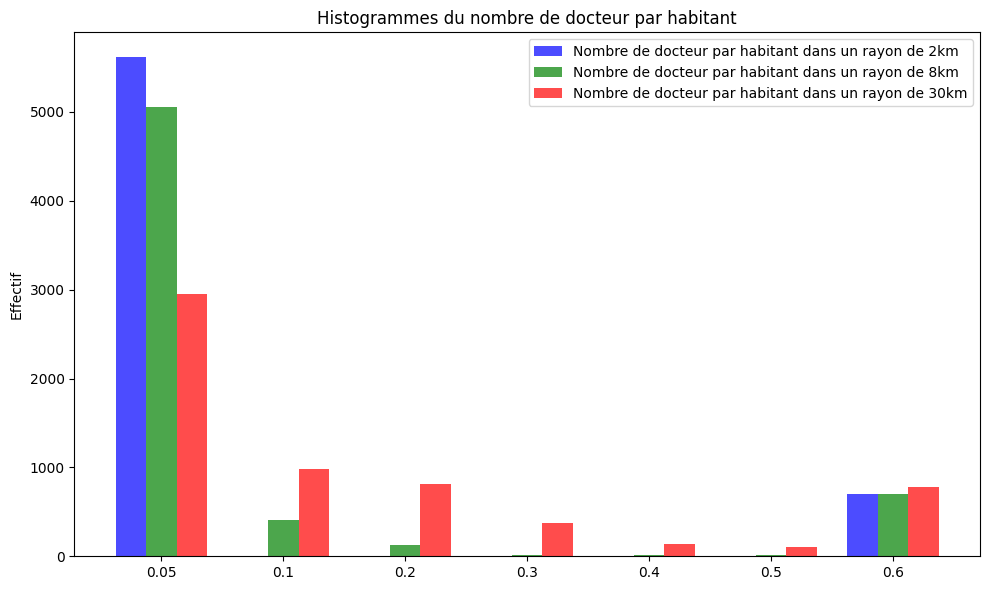

In [53]:
# Exemple de données pour les 3 séries
data1 = dataFF['Nb_doct_2km']
data2 = dataFF['Nb_doct_8km']
data3 = dataFF['Nb_doct_30km']

maxi = dataFF['Nb_doct_30km'].max()
print(maxi)

# Paramètres
bins = [0,0.05,0.1,0.2,0.3,0.4,0.5,0.6]  # Nombre de bacs
width = 0.25  # Largeur des barres

# Calculer les histogrammes
hist1, bin_edges1 = np.histogram(data1, bins=bins)
hist2, bin_edges2 = np.histogram(data2, bins=bins)
hist3, bin_edges3 = np.histogram(data3, bins=bins)

# Définir les positions des barres
x1 = np.arange(len(hist1))  # Positions pour data1
x2 = x1 + width  # Décaler pour data2
x3 = x1 + 2 * width  # Décaler pour data3

# Créer un histogramme pour les 3 ensembles de données
plt.figure(figsize=(10, 6))

# Dessiner les histogrammes avec des positions décalées
plt.bar(x1, hist1, width=width, label='Nombre de docteur par habitant dans un rayon de 2km', color='blue', alpha=0.7)
plt.bar(x2, hist2, width=width, label='Nombre de docteur par habitant dans un rayon de 8km', color='green', alpha=0.7)
plt.bar(x3, hist3, width=width, label='Nombre de docteur par habitant dans un rayon de 30km', color='red', alpha=0.7)

# Ajouter un titre et des légendes
plt.title('Histogrammes du nombre de docteur par habitant')
plt.ylabel('Effectif')
plt.xticks(x1 + width, bins[1:]) 

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()  # Ajuster l'espacement
plt.show()


Text(0.5, 1.0, 'Number of doctors compared to the level of filling of Présentation')

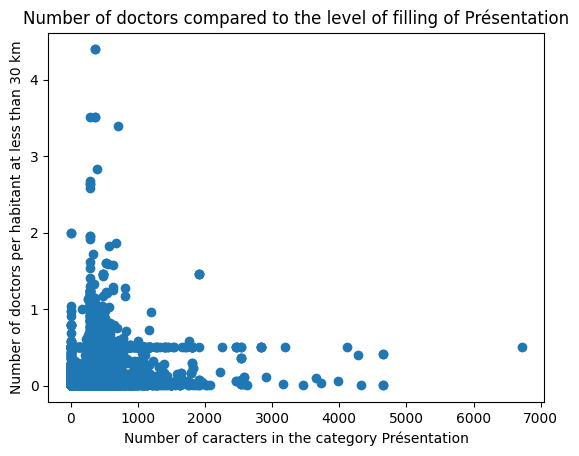

In [54]:
plt.scatter(dataFF['Nb_charac_presentation'],dataFF['Nb_doct_30km'])
plt.xlabel('Number of caracters in the category Présentation')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the level of filling of Présentation')

In [55]:
dataFF['Nb_charac_presentation'].value_counts()

Nb_charac_presentation
284     2316
0        792
281      401
380       68
351       35
        ... 
2014       1
914        1
1061       1
2247       1
19         1
Name: count, Length: 852, dtype: int64

In [56]:
dataFF[dataFF['Nb_charac_presentation']==284]

,index,Doctor Name,Specialty,card_0,card_3,card_4,Latitude,Longitude,Skills Processed,RPPS,...,Nb_doct_30km,Nb_doct_f_2km,Nb_doct_f_8km,Nb_doct_f_30km,Nb_doct_D_2km,Nb_doct_D_8km,Nb_doct_D_30km,Nb_doct_f_D_2km,Nb_doct_f_D_8km,Nb_doct_f_D_30km
65,1072,Dr Victor IONESCU,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation', '25 €', 'ECG', '39,...",46.463603,-0.782714,NaN,10100152379,...,0.012483,0.001218,0.001598,0.005024,0.000228,0.000228,0.000837,0.000076,0.003654,0.012483
390,7765,Dr Sophie BERTAUD,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', 'Consultation Générale', '26,50 €',...",49.052926,4.007558,"['Expertises et actes', 'Mésothérapie']",10001754760,...,0.131619,0.000571,0.006095,0.069524,0.000381,0.000952,0.006667,0.000190,0.012571,0.131619
472,8874,Dr Nathalie Targowla,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation adultes et enfants de...",45.985185,-1.034242,NaN,10001057883,...,0.239399,0.000442,0.022527,0.116166,0.000442,0.001325,0.013693,0.000442,0.047261,0.239399
614,10783,Dr Lucie TOURNEUX,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation', '25 €', 'Consultati...",47.180925,-1.579339,"['Expertises et actes', ""Médecine de l'enfant ...",10100494383,...,0.073350,0.000831,0.031980,0.045917,0.000098,0.003521,0.005575,0.000098,0.050954,0.073350
715,11705,Dr Cécile NIOCHE,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation', '25 €', 'Consultati...",47.180925,-1.579339,"['Expertises et actes', ""Médecine de l'enfant ...",10100457810,...,0.073350,0.000831,0.031980,0.045917,0.000098,0.003521,0.005575,0.000098,0.050954,0.073350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,137939,Dr Thibault Leray,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...",NaN,48.043746,-1.496534,"['Expertises et actes', 'Bilan de mémoire', 'C...",10101537776,...,0.103216,0.000379,0.002372,0.062992,0.000474,0.000664,0.005692,0.000000,0.003700,0.103216
6328,137961,Laurent Wormser,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation vidéo 1 à 2 motif(s)'...",48.867831,2.349261,"['Expertises et actes', 'Maladies/infections s...",10003753125,...,0.504679,0.269869,0.269869,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679
6330,139511,Dr Maxime Blanchard,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...",NaN,50.354143,3.125980,NaN,10101215597,...,0.244955,0.002055,0.017937,0.104447,0.000561,0.003176,0.018871,0.000187,0.043722,0.244955
6331,139845,Dr Yves LEYLDE,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', 'Consultation de médecine générale'...",44.469148,1.482660,"['Expertises et actes', 'Frottis', ""Médecine d...",10003988994,...,0.167852,0.002845,0.051209,0.081081,0.001422,0.001422,0.002845,0.000000,0.119488,0.167852


Text(0.5, 1.0, 'Number of doctors compared to the number of skills mentioned')

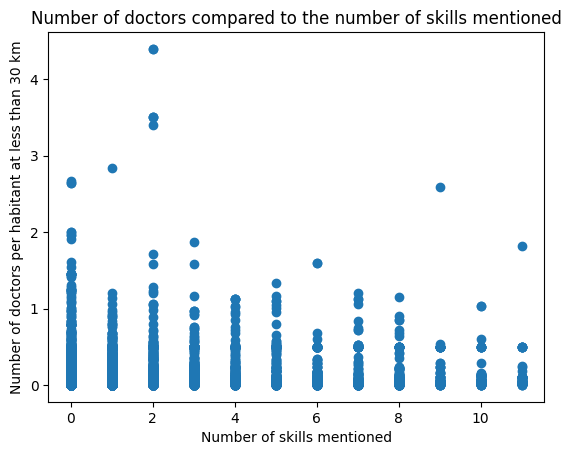

In [57]:
plt.scatter(dataFF['Nb_Skills'],dataFF['Nb_doct_30km'])
plt.xlabel('Number of skills mentioned')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the number of skills mentioned')

Text(0.5, 1.0, 'Number of doctors compared to the ratio of doctors on Doctolib')

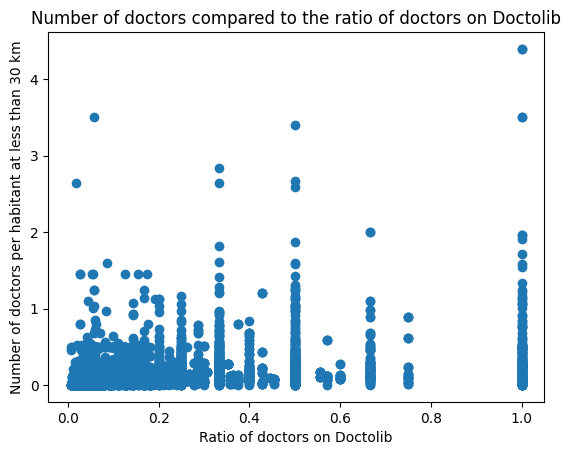

In [58]:
plt.scatter(dataFF['share_Doctolib'],dataFF['Nb_doct_30km'])
plt.xlabel('Ratio of doctors on Doctolib')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the ratio of doctors on Doctolib')

Text(0.5, 1.0, 'Number of doctors compared to the ratio of doctors on Doctolib')

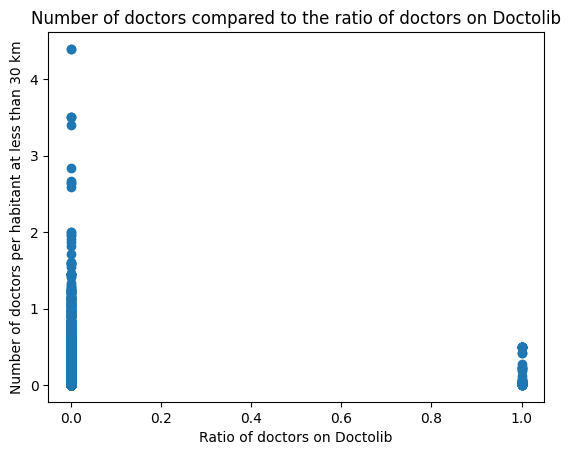

In [59]:
plt.scatter(dataFF['Work_&_publications_b'],dataFF['Nb_doct_30km'])
plt.xlabel('Ratio of doctors on Doctolib')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the ratio of doctors on Doctolib')

In [60]:
# Obtenir les statistiques descriptives
stats = dataFF[liste_var_descri].describe()

# Convertir les résultats en LaTeX
stats_transposed = stats.T
latex_table = stats_transposed.to_latex(index=True, float_format="%.2f")

# Afficher le tableau LaTeX
print(latex_table)


\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Nb_Skills & 6333.00 & 1.93 & 2.63 & 0.00 & 0.00 & 1.00 & 3.00 & 11.00 \\
Payment_method & 6333.00 & 0.78 & 0.41 & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Social_security_card & 6333.00 & 0.78 & 0.41 & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Sector & 6333.00 & 0.87 & 0.55 & 0.00 & 1.00 & 1.00 & 1.00 & 3.00 \\
site & 6333.00 & 0.10 & 0.31 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
National_&_university_degrees & 6333.00 & 0.52 & 0.50 & 0.00 & 0.00 & 1.00 & 1.00 & 1.00 \\
Nb_charac_presentation & 6333.00 & 381.14 & 378.51 & 0.00 & 281.00 & 284.00 & 412.00 & 6715.00 \\
Other_formations_b & 6333.00 & 0.12 & 0.32 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Work_&_publications_b & 6333.00 & 0.01 & 0.09 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Nb_languages & 6333.00 & 0.99 & 1.11 & 0.00 & 0.00 & 1.00 & 2.00 & 8.00 \\
Experiences_b & 6333.00 & 0.05 & 0.23 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
nb_charac_card_1 & 6333.0

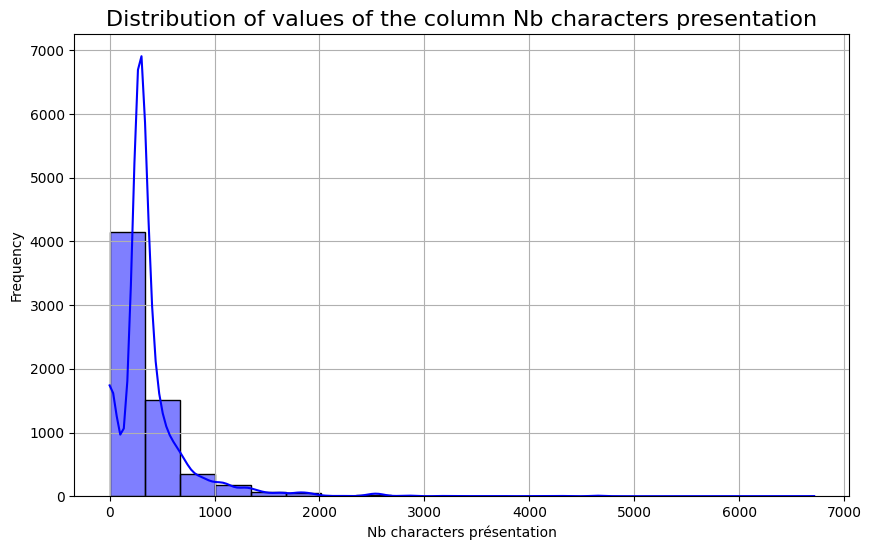

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme et courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(dataFF['Nb_charac_presentation'], kde=True, bins=20, color='blue')

# Titres et légendes
plt.title(f"Distribution of values of the column {'Nb characters presentation'}", fontsize=16)
plt.xlabel('Nb characters présentation')
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig('nb_carac')

# Afficher le graphique
plt.show()

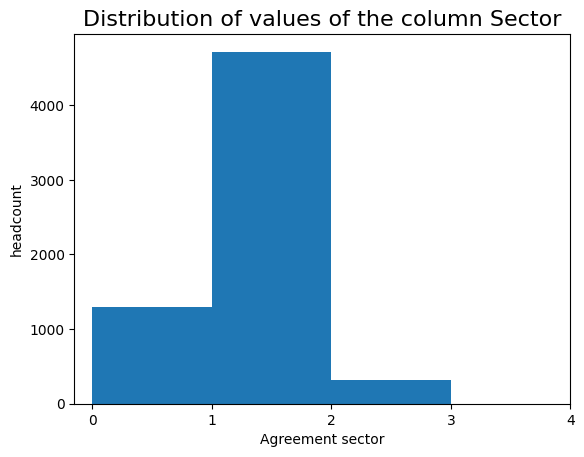

In [62]:
plt.hist(dataFF['Sector'],bins=[0,1,2,3])
plt.xticks([0,1,2,3,4]) 
plt.title(f"Distribution of values of the column {'Sector'}", fontsize=16)
plt.xlabel('Agreement sector')
plt.ylabel("headcount")

plt.savefig('sector')

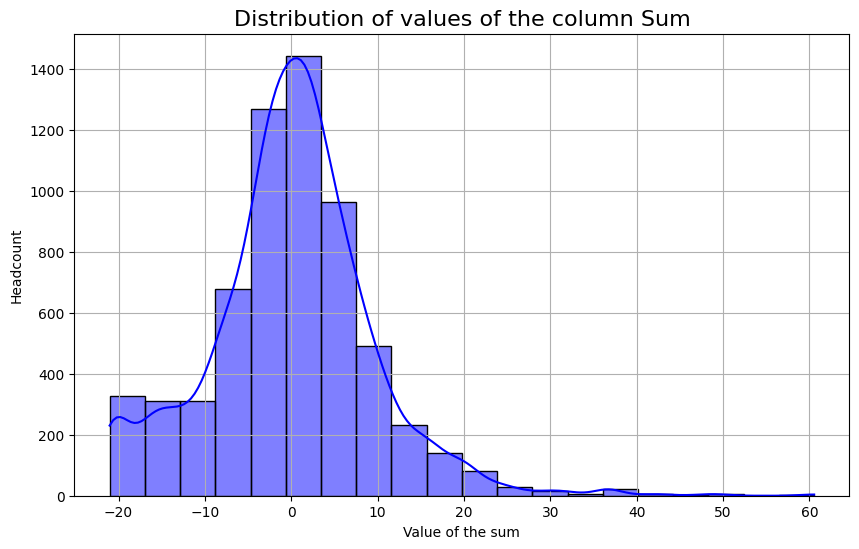

In [63]:
# Histogramme et courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(dataFF_red_norm_gauss['sum'], kde=True, bins=20, color='blue')

# Titres et légendes
plt.title(f"Distribution of values of the column {'Sum'}", fontsize=16)
plt.xlabel('Value of the sum')
plt.ylabel("Headcount")
plt.grid(True)


plt.savefig('sum')
# Afficher le graphique
plt.show()

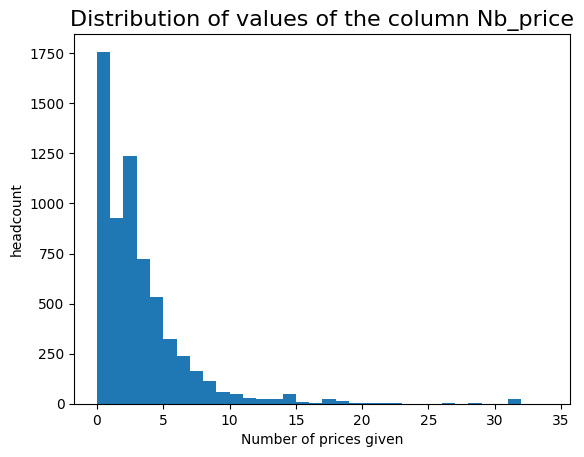

In [64]:
plt.hist(dataFF['Nb_price'], bins=[f for f in range(35)])
plt.title(f"Distribution of values of the column {'Nb_price'}", fontsize=16)
plt.xlabel('Number of prices given')
plt.ylabel("headcount")

plt.savefig('price')

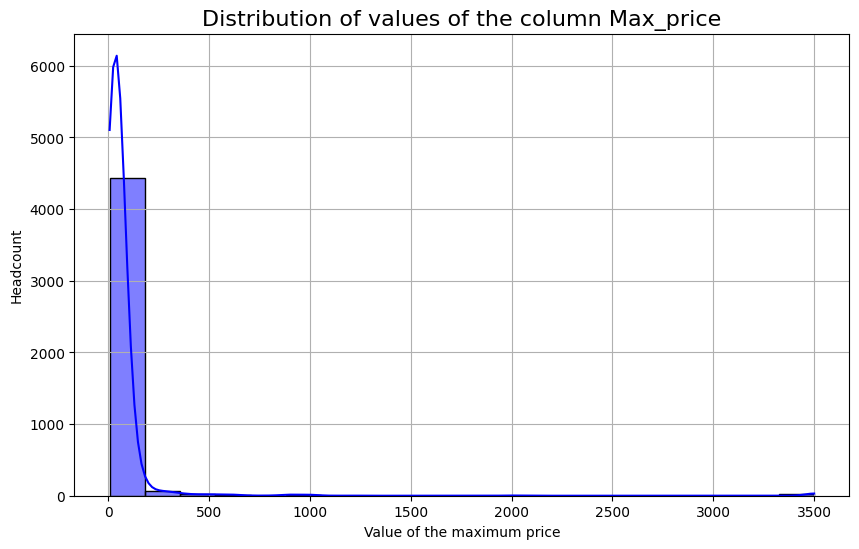

In [65]:
# Histogramme et courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(dataFF_red_norm_gauss['Max_price'], kde=True, bins=20, color='blue')

# Titres et légendes
plt.title(f"Distribution of values of the column {'Max_price'}", fontsize=16)
plt.xlabel('Value of the maximum price')
plt.ylabel("Headcount")
plt.grid(True)


plt.savefig('max')
# Afficher le graphique
plt.show()

In [66]:
maxi = dataFF_red_norm_gauss['Max_price'].max()
dataFF_red_norm_gauss[dataFF_red_norm_gauss['Max_price']==maxi]

,Nb_Skills,Payment_method,Social_security_card,site,Nb_charac_presentation,Nb_languages,nb_charac_card_1,Transport,Parking,Contact,...,Nb_doct_D_2km,Nb_doct_D_8km,Nb_doct_D_30km,Nb_doct_f_D_2km,Nb_doct_f_D_8km,Nb_doct_f_D_30km,APL,Fibre,share_Doctolib,sum
142,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000096,0.000216,0.001057,0.000048,0.006032,0.017016,2.121,0.943970,0.024096,36.623753
143,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000167,0.000556,0.003670,0.000000,0.006562,0.055778,2.121,0.943970,0.024096,36.623753
144,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000626,0.002016,0.004587,0.000278,0.021546,0.061093,2.121,0.943970,0.024096,36.623753
145,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000074,0.000331,0.001232,0.000018,0.003623,0.016001,2.121,0.943970,0.024096,36.623753
146,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000096,0.000216,0.001057,0.000048,0.006032,0.017016,2.140,0.974467,0.230769,36.623753
147,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000167,0.000556,0.003670,0.000000,0.006562,0.055778,2.140,0.974467,0.230769,36.623753
148,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000626,0.002016,0.004587,0.000278,0.021546,0.061093,2.140,0.974467,0.230769,36.623753
149,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000074,0.000331,0.001232,0.000018,0.003623,0.016001,2.140,0.974467,0.230769,36.623753
150,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000096,0.000216,0.001057,0.000048,0.006032,0.017016,3.160,0.901976,0.136364,36.623753
151,3.065199,0.526335,0.526335,-0.340483,0.908461,4.508179,1.528955,1.087591,1.684557,0.69203,...,0.000167,0.000556,0.003670,0.000000,0.006562,0.055778,3.160,0.901976,0.136364,36.623753


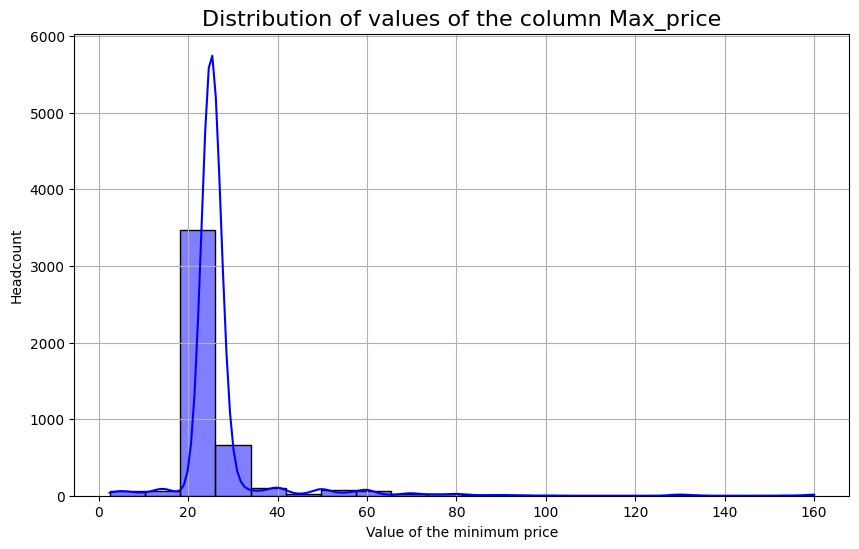

In [67]:
# Histogramme et courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(dataFF_red_norm_gauss['Min_price'], kde=True, bins=20, color='blue')

# Titres et légendes
plt.title(f"Distribution of values of the column {'Max_price'}", fontsize=16)
plt.xlabel('Value of the minimum price')
plt.ylabel("Headcount")
plt.grid(True)


plt.savefig('max')
# Afficher le graphique
plt.show()